In [821]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

listings = pd.read_csv("listings_airbnb.csv", parse_dates=['host_since'])
pd.options.display.max_columns = 99

listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,https://www.airbnb.com/users/show/68534156,Cristina,2016-04-23,"Rome, Italy",Mi piace viaggiare sono molto ospitale e ho vi...,within a few hours,100%,96%,t,https://a0.muscache.com/im/pictures/user/b0b95...,https://a0.muscache.com/im/pictures/user/b0b95...,NaN,2.0,3.0,"['email', 'phone']",t,t,"Ciampino, Lazio, Italy",VII San Giovanni/Cinecittà,NaN,41.78984,12.60899,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",$45.00,1,3,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,8,38,68,343,2022-09-12,213,8,0,2017-04-09,2022-07-12,4.74,4.84,4.92,4.85,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Italy",I am a Turkish-Italian who was born in Istanbu...,within a few hours,99%,3%,f,https://a0.muscache.com/im/pictures/user/de4f4...,https://a0.muscache.com/im/pictures/user/de4f4...,Testaccio,7.0,7.0,"['email', 'phone']",t,f,"Rome, Lazio, Italy",VIII Appia Antica,NaN,41.87136,12.48215,Private room,Private room,1,NaN,1.5 baths,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",$50.00,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,30,60,90,365,2022-09-12,7,0,0,2014-12-26,2015-05-28,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,https://www.airbnb.com/users/show/535822,Fabrizio,2011-04-26,"Rome, Italy","Sportivo, amante dell'arte e della mia città. ...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/282f4...,https://a0.muscache.com/im/pictures/user/282f4...,Esquilino,1.0,3.0,"['email', 'phone']",t,t,NaN,I Centro Storico,NaN,41.89711,12.50423,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",$78.00,3,60,2.0,5.0,1125.0,1125.0,3.2,1125.0,NaN,t,5,21,47,319,2022-09-12,225,30,1,2011-06-10,2022-08-25,4.11,4.37,4.22,4.65,4.53,4.40,4.20,NaN,t,1,1,0,0,1.64
3,2903,https://www.airbnb.co

In [822]:
columns = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description',
           'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location',
           'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications',
           'host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
           'latitude', 'longitude', 'bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights',
           'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
           'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60',
           'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
           'number_of_reviews_l30d', 'first_review', 'last_review', 'license',
           'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms', 'host_listings_count', 'id', 'host_id',
           'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'amenities'
          ]

listings.drop(columns, axis=1, inplace=True)
listings.head()

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2016-04-23,t,3.0,t,t,"Ciampino, Lazio, Italy",Private room in rental unit,Private room,2,NaN,1.0,1.0,$45.00,1,3,t,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,f,3.22
1,2008-09-18,f,7.0,t,f,"Rome, Lazio, Italy",Private room,Private room,1,NaN,1.0,1.0,$50.00,7,1125,t,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,f,0.07
2,2011-04-26,f,3.0,t,t,NaN,Entire rental unit,Entire home/apt,3,NaN,1.0,2.0,$78.00,3,60,t,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,t,1.64
3,2008-09-28,f,5.0,t,f,NaN,Private room in bed and breakfast,Private room,4,NaN,1.0,2.0,$164.00,1,730,t,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,f,0.33
4,2011-04-28,f,3.0,t,t,"Rome, Lazio, Italy",Entire rental unit,Entire home/apt,2,NaN,1.0,2.0,$80.00,2,1125,t,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,f,0.05


In [823]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24782 entries, 0 to 24781
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_since                   24776 non-null  datetime64[ns]
 1   host_is_superhost            24768 non-null  object        
 2   host_total_listings_count    24776 non-null  float64       
 3   host_has_profile_pic         24776 non-null  object        
 4   host_identity_verified       24776 non-null  object        
 5   neighbourhood                15433 non-null  object        
 6   property_type                24782 non-null  object        
 7   room_type                    24782 non-null  object        
 8   accommodates                 24782 non-null  int64         
 9   bathrooms                    0 non-null      float64       
 10  bedrooms                     24085 non-null  float64       
 11  beds                         24417 non-nu

In [824]:
listings.drop(['bathrooms'], axis=1, inplace=True)

## Binary Columns

In [825]:
binary_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                  'has_availability', 'instant_bookable']

In [826]:
def clean_binary(df, columns):
    for column in columns:
        df[column] = df[column].replace('f', 0)
        df[column] = df[column].replace('t', 1)
        col_mode = df[column].mode()
        df[column] = np.nan_to_num(df[column], nan=col_mode)
    return df
        
binary_cleaned = listings.copy()
binary_cleaned = clean_binary(binary_cleaned, binary_columns)

In [827]:
binary_cleaned.head()

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2016-04-23,1.0,3.0,1.0,1.0,"Ciampino, Lazio, Italy",Private room in rental unit,Private room,2,1.0,1.0,$45.00,1,3,1,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,0,3.22
1,2008-09-18,0.0,7.0,1.0,0.0,"Rome, Lazio, Italy",Private room,Private room,1,1.0,1.0,$50.00,7,1125,1,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0,0.07
2,2011-04-26,0.0,3.0,1.0,1.0,NaN,Entire rental unit,Entire home/apt,3,1.0,2.0,$78.00,3,60,1,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1,1.64
3,2008-09-28,0.0,5.0,1.0,0.0,NaN,Private room in bed and breakfast,Private room,4,1.0,2.0,$164.00,1,730,1,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0,0.33
4,2011-04-28,0.0,3.0,1.0,1.0,"Rome, Lazio, Italy",Entire rental unit,Entire home/apt,2,1.0,2.0,$80.00,2,1125,1,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0,0.05


## Date Columns

Agora, vamos limpar a coluna `host_since` que é a única coluna do dataset do tipo `datetime`.
Vamos analisar os dados nulos nesta coluna, e realizar uma transformação para facilitar nossa análise.

Para facilitar a análise, irei separar o tempo que o anfitrião começou a usar o aplicativo em quatro categorias:

- Novato: 2021 e 2022
- Experiente: entre 2017 e 2020
- Estabelecido: entre 2013 e 2016
- Veterano: desde 2008

In [828]:
import datetime as dt
binary_cleaned['host_since'].head()

0   2016-04-23
1   2008-09-18
2   2011-04-26
3   2008-09-28
4   2011-04-28
Name: host_since, dtype: datetime64[ns]

In [829]:
binary_cleaned[binary_cleaned['host_since'].isnull()]

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
17306,NaT,0.0,NaN,1.0,1.0,NaN,Entire rental unit,Entire home/apt,5,1.0,3.0,$118.00,1,1125,1,5,5.0,4.6,5.0,4.8,4.8,4.4,4.8,1,0.89
17711,NaT,0.0,NaN,1.0,1.0,NaN,Entire rental unit,Entire home/apt,3,NaN,2.0,$58.00,1,28,1,5,3.8,4.4,4.6,4.8,4.6,4.6,3.8,1,1.83
17819,NaT,0.0,NaN,1.0,1.0,NaN,Entire rental unit,Entire home/apt,4,1.0,2.0,$124.00,1,28,1,2,3.5,4.5,2.5,5.0,5.0,4.5,3.5,1,0.24
18001,NaT,0.0,NaN,1.0,1.0,NaN,Entire rental unit,Entire home/apt,8,4.0,4.0,$131.00,1,1125,1,5,4.6,4.6,4.2,5.0,5.0,4.8,4.2,1,0.64
18396,NaT,0.0,NaN,1.0,1.0,NaN,Entire villa,Entire home/apt,6,3.0,3.0,$298.00,1,1125,1,1,4.0,4.0,3.0,4.0,4.0,4.0,4.0,1,0.18
20163,NaT,0.0,NaN,1.0,1.0,NaN,Entire home,Entire home/apt,6,3.0,3.0,$594.00,1,1125,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


Para tratarmos os valores nulos, fiz a seguinte análise.
Já que não temos a data que o anfitrião começou a usar o aplicativo, podemos usar outras colunas para fazer uma estimativa.

Tem duas colunas que podemos estudar, `number_of_reviews` e `reviews_per_month`
podemos criar uma nova coluna que será `months_host` = `number_of_reviews` / `reviews_per_month`, assim tiramos quando foi o mês que o anfitrião recebeu a primeira nota de seu imóvel, o que podemos aproximar como sendo próximo a época em que se tornou anfitrião pela primeira vez no Airbnb.

In [830]:
reviews_per_month = binary_cleaned['reviews_per_month']
num_reviews = binary_cleaned['number_of_reviews']
months_host = num_reviews / reviews_per_month
binary_cleaned['months_host'] = months_host

In [831]:
binary_cleaned['host_since'] = pd.to_datetime(binary_cleaned['host_since'].astype(str), format='%Y-%m-%d')
new_year = dt.datetime(2021, 1, 1)
binary_cleaned.loc[binary_cleaned['host_since'].isnull(), 'host_since'] = new_year
binary_cleaned['host_since'].isnull().sum()

0

In [832]:
year = binary_cleaned['host_since'].dt.year
binary_cleaned['host_since'] = year

# Converte anos usando o aplicativo em categorias
def transform_experience(year):
    if year < 2013:
        return 'veterano'
    elif 2013 <= year < 2017:
        return 'estabelecido'
    elif 2017 <= year < 2021:
        return 'experiente'
    elif year >= 2021:
        return 'novato'
    
binary_cleaned['host_experience'] = binary_cleaned['host_since'].apply(transform_experience)

# Checando transformação
binary_cleaned['host_experience'].value_counts()

estabelecido    12384
experiente       7300
veterano         2883
novato           2215
Name: host_experience, dtype: int64

In [833]:
date_cleaned = binary_cleaned.copy()

map_dict = {
    'host_experience': 'host'
}
date_cleaned = pd.get_dummies(date_cleaned, columns=['host_experience'], prefix=map_dict)
date_cleaned.drop(['host_since', 'months_host'], axis=1, inplace=True)
date_cleaned.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_estabelecido,host_experiente,host_novato,host_veterano
0,1.0,3.0,1.0,1.0,"Ciampino, Lazio, Italy",Private room in rental unit,Private room,2,1.0,1.0,$45.00,1,3,1,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,0,3.22,1,0,0,0
1,0.0,7.0,1.0,0.0,"Rome, Lazio, Italy",Private room,Private room,1,1.0,1.0,$50.00,7,1125,1,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0,0.07,0,0,0,1
2,0.0,3.0,1.0,1.0,NaN,Entire rental unit,Entire home/apt,3,1.0,2.0,$78.00,3,60,1,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1,1.64,0,0,0,1
3,0.0,5.0,1.0,0.0,NaN,Private room in bed and breakfast,Private room,4,1.0,2.0,$164.00,1,730,1,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0,0.33,0,0,0,1
4,0.0,3.0,1.0,1.0,"Rome, Lazio, Italy",Entire rental unit,Entire home/apt,2,1.0,2.0,$80.00,2,1125,1,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0,0.05,0,0,0,1


## Price Column

In [834]:
date_cleaned['price'] = date_cleaned['price'].str.replace('$', '')
date_cleaned['price'] = date_cleaned['price'].str.replace(',', '')
date_cleaned['price'] = date_cleaned['price'].astype('float')
date_cleaned['price']

0         45.0
1         50.0
2         78.0
3        164.0
4         80.0
         ...  
24777     55.0
24778    120.0
24779    165.0
24780     50.0
24781     40.0
Name: price, Length: 24782, dtype: float64

In [835]:
free_rents = date_cleaned[date_cleaned['price'] == 0]
free_rents

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_estabelecido,host_experiente,host_novato,host_veterano
16128,0.0,3.0,0.0,1.0,NaN,Room in boutique hotel,Hotel room,3,NaN,NaN,0.0,1,365,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,0,0
16228,0.0,4.0,1.0,1.0,NaN,Room in hotel,Hotel room,4,NaN,NaN,0.0,1,365,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,0,0
16390,0.0,5.0,1.0,1.0,NaN,Room in boutique hotel,Hotel room,0,NaN,NaN,0.0,1,365,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,0,0
16416,0.0,6.0,0.0,1.0,NaN,Room in hotel,Hotel room,4,NaN,NaN,0.0,1,365,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,0,0
17626,0.0,2.0,1.0,1.0,NaN,Room in boutique hotel,Hotel room,0,NaN,NaN,0.0,1,365,1,1,3.0,5.0,5.0,3.0,3.0,5.0,2.0,0,0.15,0,1,0,0


In [836]:
date_cleaned.drop(free_rents.index, inplace=True)
price_cleaned = date_cleaned.copy()

In [837]:
price_cleaned.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_estabelecido,host_experiente,host_novato,host_veterano
0,1.0,3.0,1.0,1.0,"Ciampino, Lazio, Italy",Private room in rental unit,Private room,2,1.0,1.0,45.0,1,3,1,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,0,3.22,1,0,0,0
1,0.0,7.0,1.0,0.0,"Rome, Lazio, Italy",Private room,Private room,1,1.0,1.0,50.0,7,1125,1,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0,0.07,0,0,0,1
2,0.0,3.0,1.0,1.0,NaN,Entire rental unit,Entire home/apt,3,1.0,2.0,78.0,3,60,1,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1,1.64,0,0,0,1
3,0.0,5.0,1.0,0.0,NaN,Private room in bed and breakfast,Private room,4,1.0,2.0,164.0,1,730,1,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0,0.33,0,0,0,1
4,0.0,3.0,1.0,1.0,"Rome, Lazio, Italy",Entire rental unit,Entire home/apt,2,1.0,2.0,80.0,2,1125,1,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0,0.05,0,0,0,1


## Neighbourhood Column

In [838]:
price_cleaned['neighbourhood'].value_counts()

Rome, Lazio, Italy                          14322
Lido di Ostia, Lazio, Italy                   210
Rome, Italy                                   167
Rome, RM, Italy                                89
Fiumicino, Lazio, Italy                        81
                                            ...  
Rome, italia, Italy                             1
Ponte Galeria, Lazio, Italy                     1
Rome, Italy/Roma/Lazio, Italy                   1
Roma lido di castel fusano, Lazio, Italy        1
Monterotondo Roma, Lazio, Italy                 1
Name: neighbourhood, Length: 171, dtype: int64

Essa coluna possui dados confusos e possivelmente errados, para não enviesar a predição do modelo, iremos removê-la do dataset.

In [839]:
price_cleaned.drop('neighbourhood', axis=1, inplace=True)

## Property Column

In [840]:
price_cleaned['room_type'].value_counts(dropna=False)

Entire home/apt    16584
Private room        7276
Hotel room           778
Shared room          139
Name: room_type, dtype: int64

In [841]:
price_cleaned['property_type'].value_counts()

Entire rental unit                   10513
Entire condo                          3856
Private room in rental unit           2857
Private room in bed and breakfast     1847
Private room in condo                 1040
                                     ...  
Castle                                   1
Private room in pension                  1
Private room in bungalow                 1
Private room in cabin                    1
Shared room in townhouse                 1
Name: property_type, Length: 71, dtype: int64

In [842]:
price_cleaned = pd.get_dummies(price_cleaned, columns=['room_type'], prefix='', prefix_sep='')
price_cleaned.drop(['property_type'], axis=1, inplace=True)
date_cleaned.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_estabelecido,host_experiente,host_novato,host_veterano
0,1.0,3.0,1.0,1.0,"Ciampino, Lazio, Italy",Private room in rental unit,Private room,2,1.0,1.0,45.0,1,3,1,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,0,3.22,1,0,0,0
1,0.0,7.0,1.0,0.0,"Rome, Lazio, Italy",Private room,Private room,1,1.0,1.0,50.0,7,1125,1,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0,0.07,0,0,0,1
2,0.0,3.0,1.0,1.0,NaN,Entire rental unit,Entire home/apt,3,1.0,2.0,78.0,3,60,1,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1,1.64,0,0,0,1
3,0.0,5.0,1.0,0.0,NaN,Private room in bed and breakfast,Private room,4,1.0,2.0,164.0,1,730,1,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0,0.33,0,0,0,1
4,0.0,3.0,1.0,1.0,"Rome, Lazio, Italy",Entire rental unit,Entire home/apt,2,1.0,2.0,80.0,2,1125,1,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0,0.05,0,0,0,1


In [843]:
property_cleaned = price_cleaned.copy()

In [844]:
property_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24777 entries, 0 to 24781
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            24777 non-null  float64
 1   host_total_listings_count    24771 non-null  float64
 2   host_has_profile_pic         24777 non-null  float64
 3   host_identity_verified       24777 non-null  float64
 4   accommodates                 24777 non-null  int64  
 5   bedrooms                     24085 non-null  float64
 6   beds                         24417 non-null  float64
 7   price                        24777 non-null  float64
 8   minimum_nights               24777 non-null  int64  
 9   maximum_nights               24777 non-null  int64  
 10  has_availability             24777 non-null  int64  
 11  number_of_reviews            24777 non-null  int64  
 12  review_scores_rating         21062 non-null  float64
 13  review_scores_ac

In [845]:
column_mean = property_cleaned['host_total_listings_count'].mean()
property_cleaned['host_total_listings_count'].fillna(column_mean, inplace=True)

In [846]:
property_cleaned['bedrooms'].fillna(1, inplace=True)

In [847]:
property_cleaned['beds'].fillna(property_cleaned['bedrooms'], inplace=True)

In [848]:
def mean_imputation(df, columns):
    for col in columns:
        col_mean = df[col].mean()
        df[col].fillna(col_mean, inplace=True)
    return df

columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
           'review_scores_value']
property_cleaned = mean_imputation(property_cleaned, columns)

In [849]:
property_cleaned['reviews_per_month'].fillna(0, inplace=True)

In [850]:
listings_cleaned = property_cleaned.copy()

## Outliers

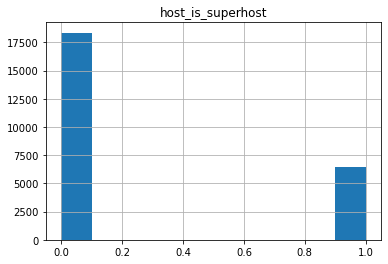

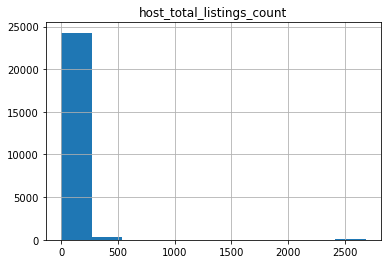

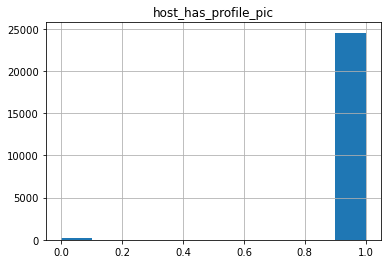

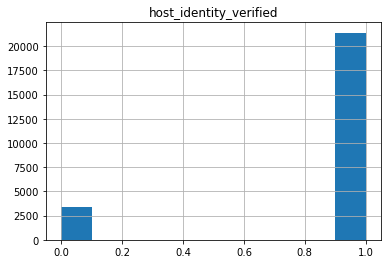

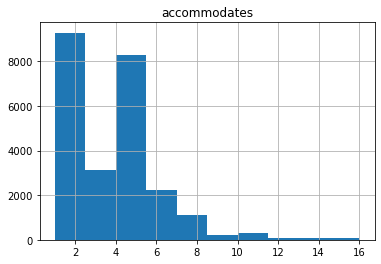

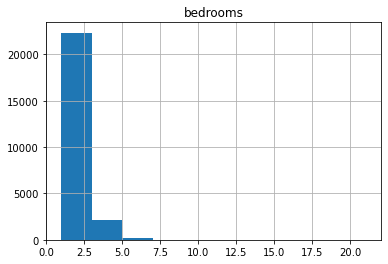

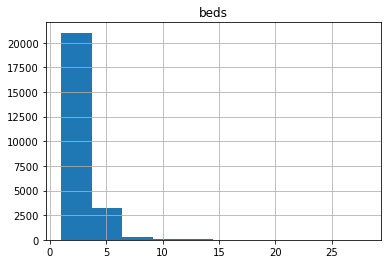

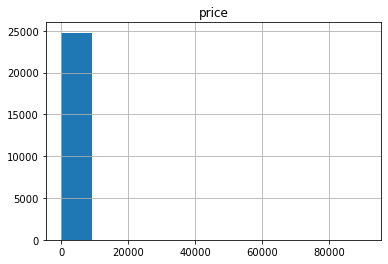

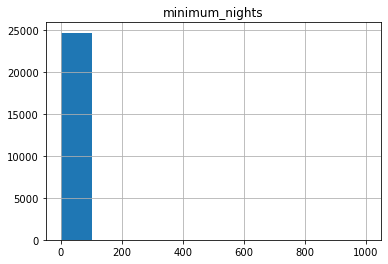

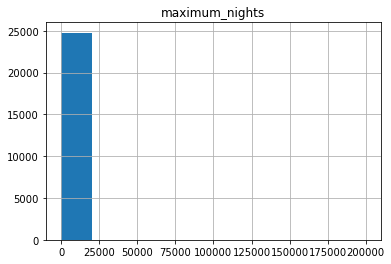

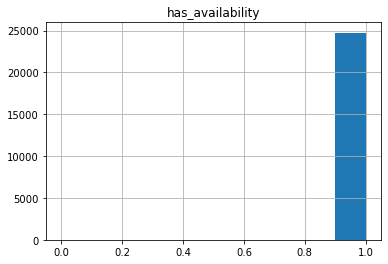

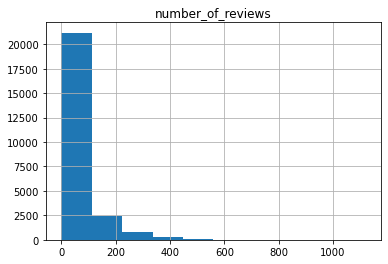

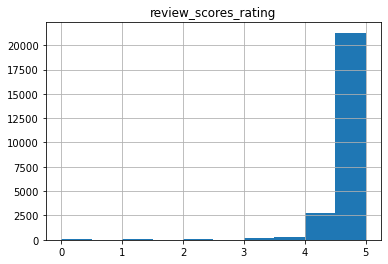

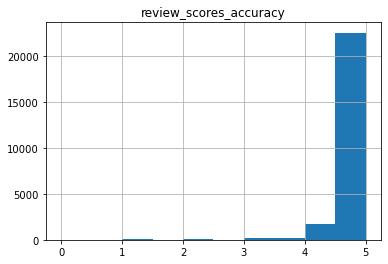

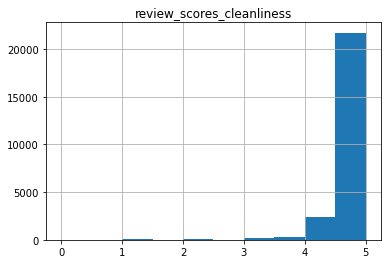

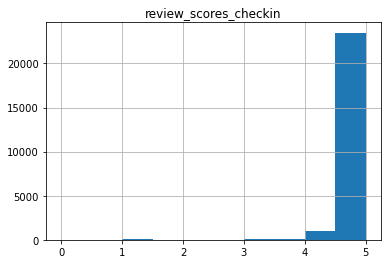

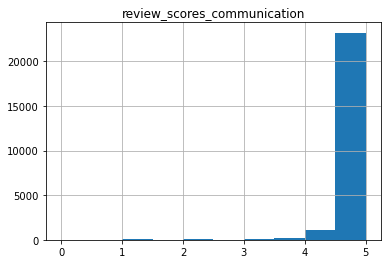

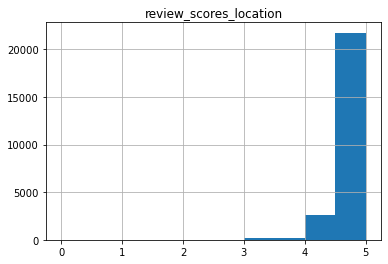

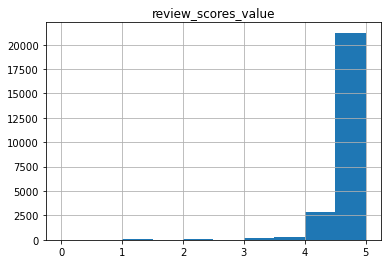

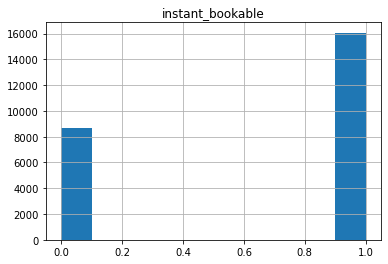

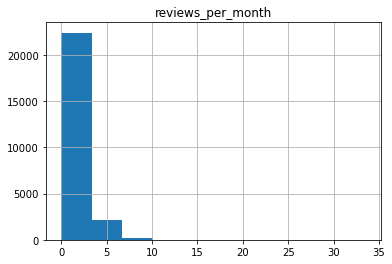

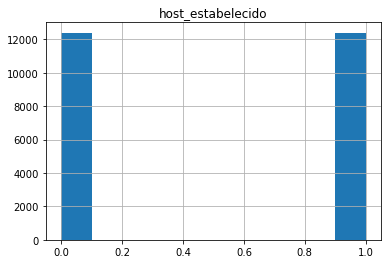

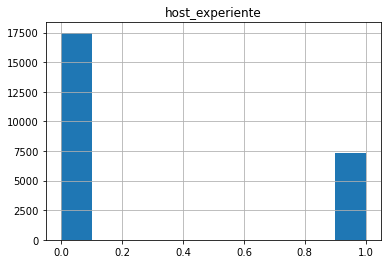

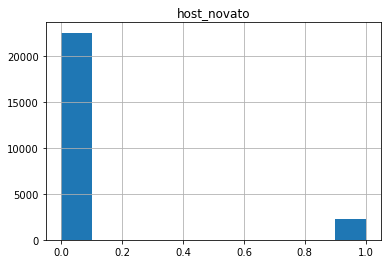

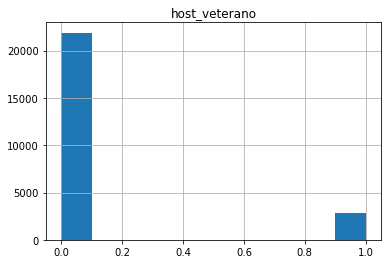

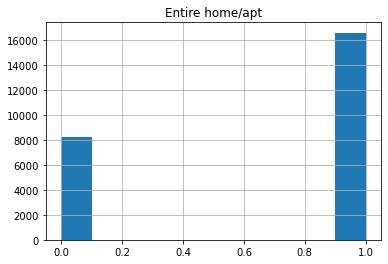

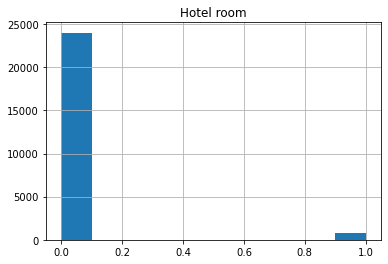

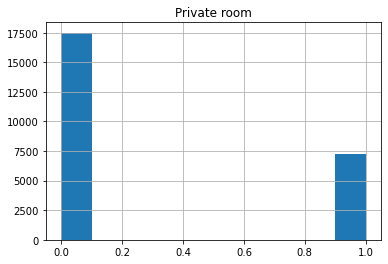

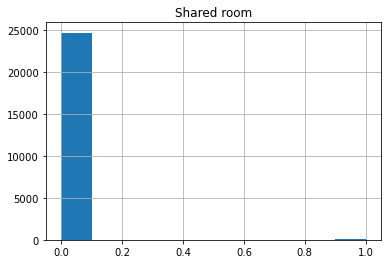

In [851]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist_plot(df, columns):
    for col in columns:
        df.hist(col)
        plt.show()
        
columns = ['host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'host_estabelecido', 'host_experiente',
       'host_novato', 'host_veterano', 'Entire home/apt', 'Hotel room',
       'Private room', 'Shared room']

hist_plot(listings_cleaned, listings_cleaned.columns)

In [852]:
def drop_column(df, columns):
    for col in columns:
        df.drop(col, axis=1, inplace=True)
    return df

columns = ['has_availability', 'host_has_profile_pic']
listings_cleaned = drop_column(listings_cleaned, columns)

In [853]:
listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24777 entries, 0 to 24781
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            24777 non-null  float64
 1   host_total_listings_count    24777 non-null  float64
 2   host_identity_verified       24777 non-null  float64
 3   accommodates                 24777 non-null  int64  
 4   bedrooms                     24777 non-null  float64
 5   beds                         24777 non-null  float64
 6   price                        24777 non-null  float64
 7   minimum_nights               24777 non-null  int64  
 8   maximum_nights               24777 non-null  int64  
 9   number_of_reviews            24777 non-null  int64  
 10  review_scores_rating         24777 non-null  float64
 11  review_scores_accuracy       24777 non-null  float64
 12  review_scores_cleanliness    24777 non-null  float64
 13  review_scores_ch

In [854]:
listings_cleaned['price'].describe()

count    24777.000000
mean       172.597380
std        964.839138
min         10.000000
25%         70.000000
50%        104.000000
75%        165.000000
max      91000.000000
Name: price, dtype: float64

In [855]:
def iqr(df, columns, scale=1.5):
    """Define os limites inferior e superior do método IQR
    """
    for col in columns:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        iqr = q3 - q1
        sup_limit = q3 + scale * iqr
        inf_limit = q1 - scale * iqr
        df.drop(df[df[col] > sup_limit].index, inplace=True)
        df.drop(df[df[col] < inf_limit].index, inplace=True)
    return df
        
columns = ['host_total_listings_count', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']
listings_ready = listings_cleaned.copy()
listings_ready = iqr(listings_ready, columns)

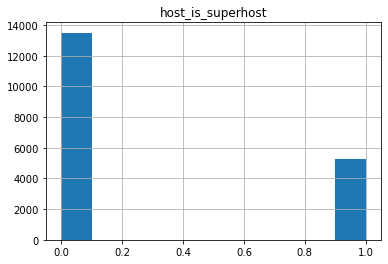

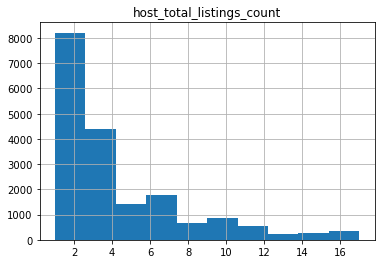

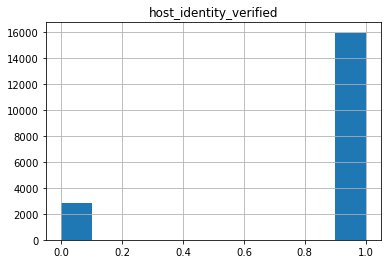

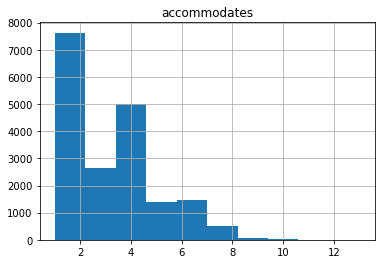

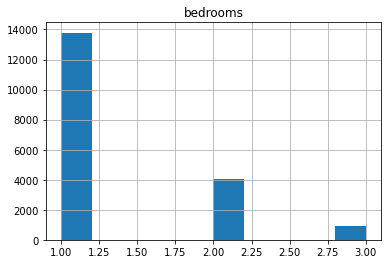

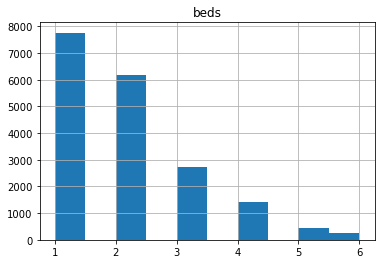

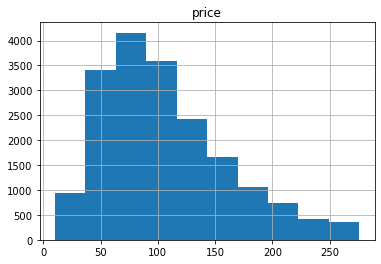

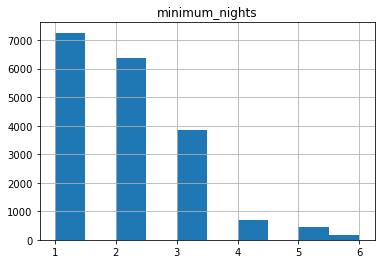

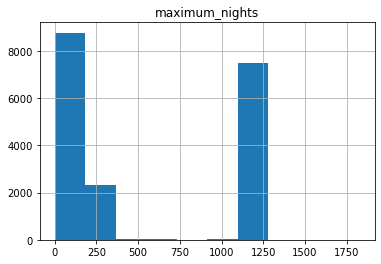

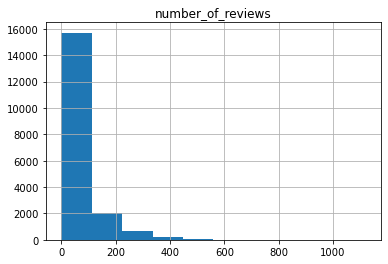

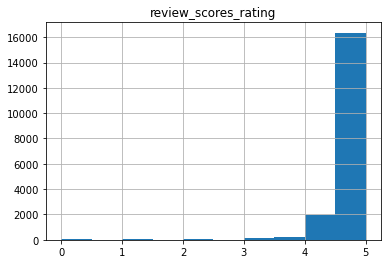

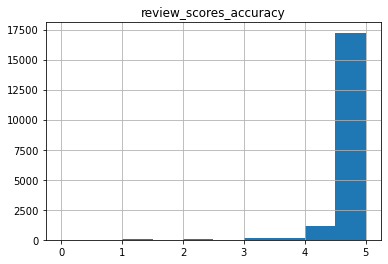

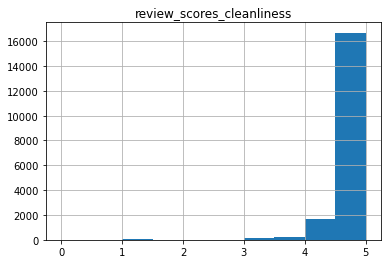

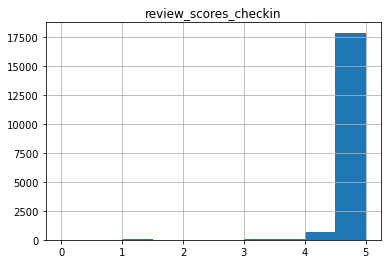

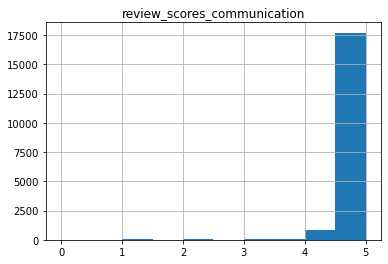

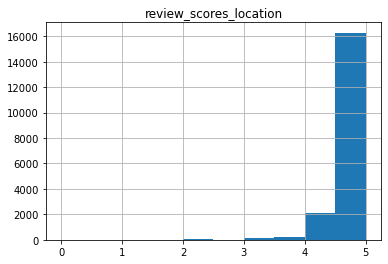

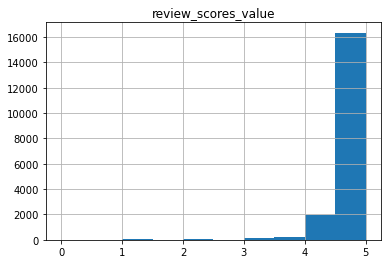

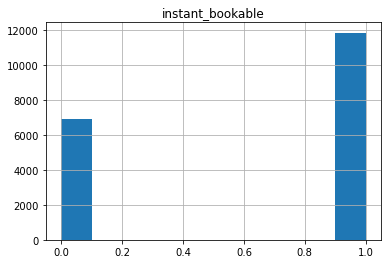

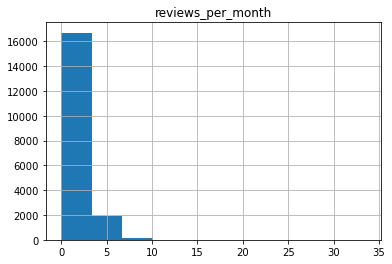

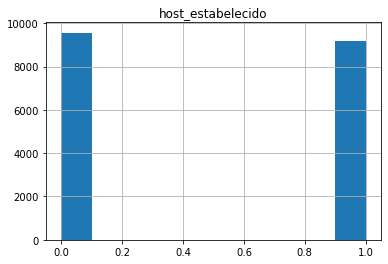

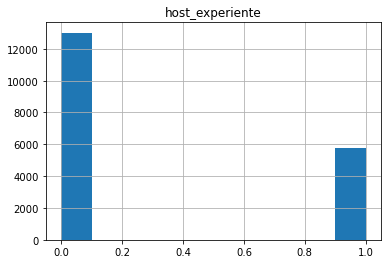

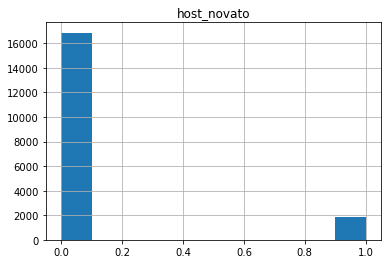

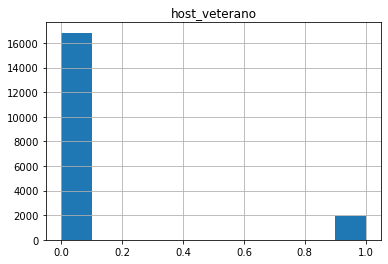

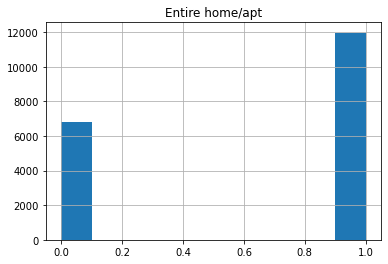

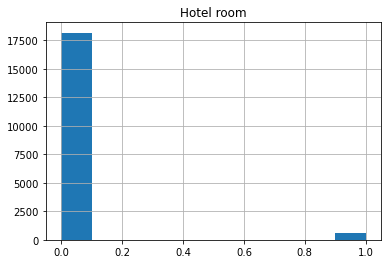

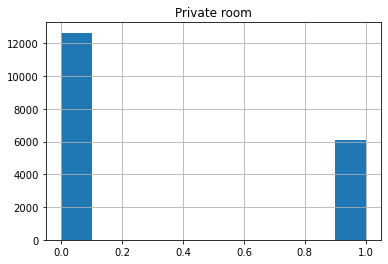

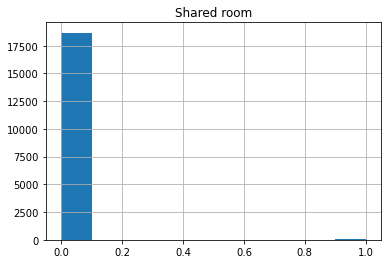

In [856]:
hist_plot(listings_ready, listings_ready.columns)

## Machine Learning Model

In [857]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model


def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=[np.number])
    features = numeric_df.columns.drop("price")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:9379]
        test = df[9379:]
        
        lr.fit(train[features], train["price"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["price"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:9379]
        test = df[9379:]
        
        lr.fit(train[features], train['price'])
        predictions_one = lr.predict(test[features])
        
        mse_one = mean_squared_error(test['price'], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test['price'])
        predictions_two = lr.predict(train[features])
        
        mse_two = mean_squared_error(test['price'], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train['price'])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test['price'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse

rmse = train_and_test(listings_ready, k=4)

rmse

[45.02580535058188, 44.739129907482194, 44.4517575015806, 45.23186193037732]


44.862138672505495